In [761]:
import numpy as np
from functions.eda import *
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [762]:
import pandas as pd
import polars as pl
data=pl.read_csv("CarPrice_Assignment.csv")
data.head()

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
1,3,"""alfa-romero gi…","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,"""alfa-romero st…","""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,"""alfa-romero Qu…","""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,"""audi 100 ls""","""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
5,2,"""audi 100ls""","""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0


In [763]:
data=data.drop("car_ID","CarName")

Missing Values

In [764]:
data.null_count().sum().sum_horizontal()

sum
u32
0


In [765]:
cat_cols=[i for i in data.columns if data[i].dtype==pl.String]
num_cols=[i for i in data.drop("price").columns if data[i].dtype!=pl.String]

In [766]:
data[cat_cols].null_count()

fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


Number of unique

In [767]:
for i in cat_cols:
    print(i," ",data[i].n_unique())

fueltype   2
aspiration   2
doornumber   2
carbody   5
drivewheel   3
enginelocation   2
enginetype   7
cylindernumber   7
fuelsystem   8


In [768]:
data[num_cols].null_count()

symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0


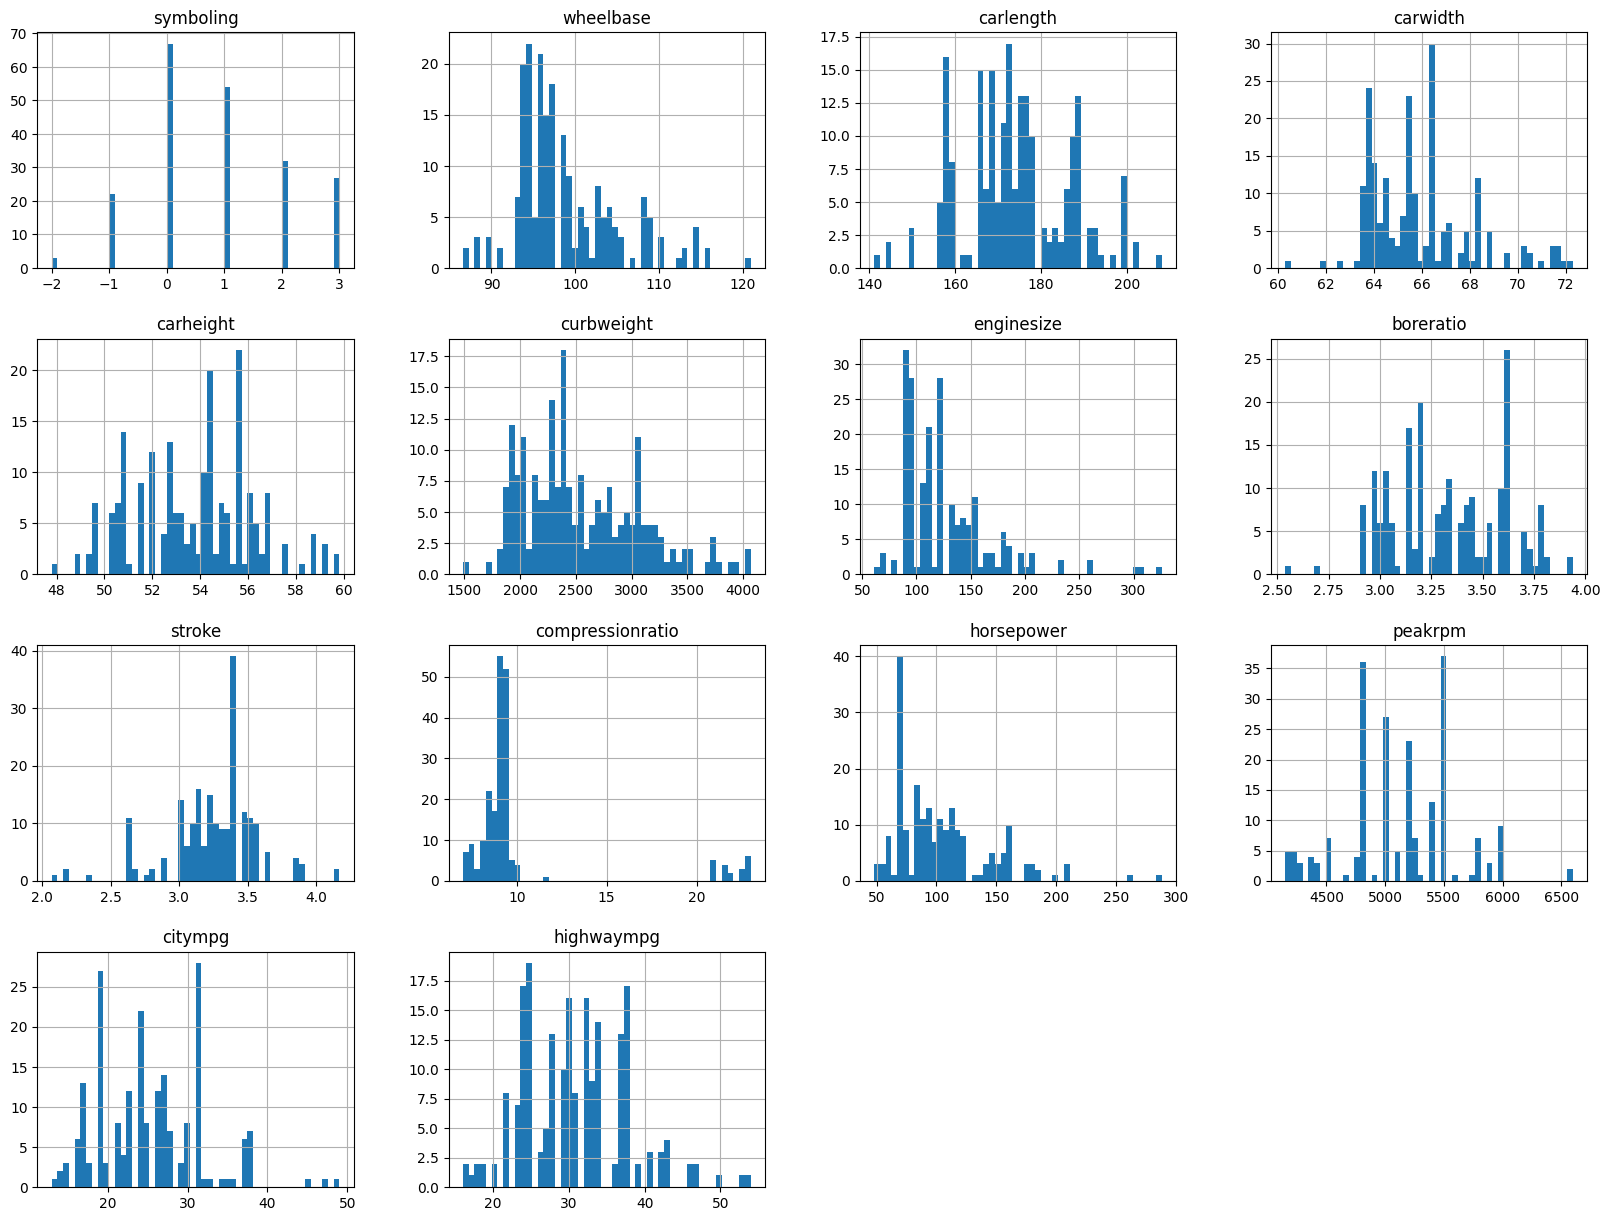

In [769]:
data[num_cols].to_pandas().hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot: >

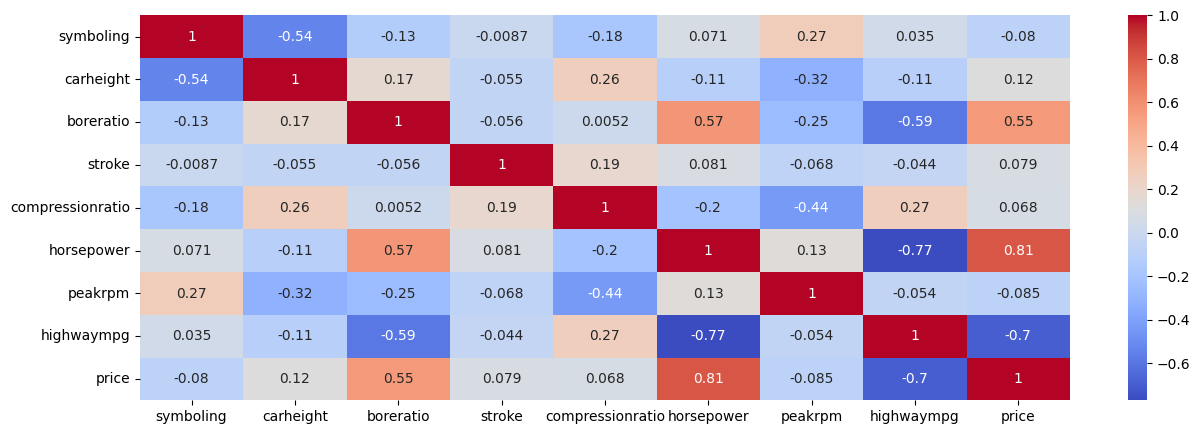

In [770]:
plt.figure(figsize=(15,5))
sns.heatmap(data=data[num_cols+["price"]].drop(["carlength","carwidth","citympg","curbweight","enginesize","wheelbase"]).to_pandas().corr(),cmap="coolwarm",annot=True)

In [771]:
data.with_columns((pl.col("carlength")*pl.col("carwidth")).alias("carsize"))

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsize
i64,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0,11213.6
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0,11690.92
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0,11726.24
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,2952,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,9.5,114,5400,23,28,16845.0,13008.32
-1,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.8,55.5,3049,"""ohc""","""four""",141,"""mpfi""",3.78,3.15,8.7,160,5300,19,25,19045.0,12989.44
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",109.1,188.8,68.9,55.5,3012,"""ohcv""","""six""",173,"""mpfi""",3.58,2.87,8.8,134,5500,18,23,21485.0,13008.32


In [772]:
data=data.drop(["carlength","carwidth","citympg","curbweight","enginesize","wheelbase"])

In [773]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [789]:
target_encoder = TargetEncoder()
from sklearn.metrics import r2_score
for train_index, valid_index in kf.split(data):
    # Split data into training and validation sets
    train_data, valid_data = data.to_pandas().iloc[train_index], data.to_pandas().iloc[valid_index]
    
    # Fit target encoder on training data and transform both training and validation data
    train_data_encoded = target_encoder.fit_transform(train_data.drop(columns=['price']), train_data['price'])
    valid_data_encoded = target_encoder.transform(valid_data.drop(columns=['price']))
    
    # Use encoded data for model training and evaluation
    # (Here you would train your model on train_data_encoded and evaluate on valid_data_encoded)
    lr=LinearRegression()
    lr.fit(train_data_encoded, train_data['price'])
    predict=lr.predict(valid_data_encoded)
    print("R2:",r2_score(valid_data["price"],predict))

R2: 0.7994046374594933
R2: 0.7212740176365774
R2: 0.8867456659510529
R2: 0.7976417962847681
R2: 0.6648011269846941


In [787]:
valid_data_encoded

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
9,0,13083.329209,15029.029649,12945.283326,10654.904473,12677.129360,12826.435081,52.0,11127.672114,14722.350136,17707.328551,3.13,3.400,7.00,160,5500,22
15,0,13083.329209,12677.849971,13458.515877,13829.837100,19334.047830,12826.435081,55.7,11127.672114,18138.332317,17707.328551,3.62,3.390,8.00,182,5400,22
16,0,13083.329209,12677.849971,12945.283326,13829.837100,19334.047830,12826.435081,53.7,11127.672114,18138.332317,17707.328551,3.62,3.390,8.00,182,5400,22
18,2,13083.329209,12677.849971,12945.283326,10654.904473,9292.705593,12826.435081,53.2,13878.309488,13223.414634,7642.485054,2.91,3.030,9.50,48,5100,53
25,1,13083.329209,12677.849971,13458.515877,13829.837100,9292.705593,12826.435081,50.6,11127.672114,10458.465410,7642.485054,2.97,3.230,9.40,68,5500,38
30,2,13083.329209,12677.849971,12945.283326,10654.904473,9292.705593,12826.435081,50.8,11127.672114,10458.465410,11728.042607,2.91,3.410,9.60,58,4800,54
45,0,13083.329209,12677.849971,13458.515877,13829.837100,9292.705593,12826.435081,52.0,11127.672114,10458.465410,7642.485054,3.03,3.110,9.60,70,5400,43
55,3,13083.329209,12677.849971,12945.283326,10654.904473,19334.047830,12826.435081,49.6,13298.832614,13298.832614,13155.551009,3.33,3.255,9.40,101,6000,23
60,0,13083.329209,12677.849971,13458.515877,13829.837100,9292.705593,12826.435081,55.5,11127.672114,10458.465410,7642.485054,3.39,3.390,8.60,84,4800,32
65,0,13083.329209,12677.849971,13458.515877,13829.837100,19334.047830,12826.435081,54.4,11127.672114,10458.465410,17707.328551,3.76,3.160,8.00,120,5000,27


In [746]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data=data.to_dummies(cat_cols)
X=pt.fit_transform(data.drop("price"))
# X=data.drop("price")
y=data["price"]

In [777]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [778]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,205.000000,2.050000e+02,2.050000e+02,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.906334e-16,3.032804e-17,4.202600e-16,6.325563e-16,6.065609e-17,5.199093e-17,-5.199093e-17,-5.524037e-17,1.733031e-17,-9.531671e-17,...,0.000000,-1.906334e-16,-6.065609e-17,0.000000,-4.332578e-16,6.238912e-16,2.004857e-13,4.570869e-15,-1.109140e-15,-1.998401e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448,1.002448e+00,1.002448e+00,1.002448,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.635025e+00,-3.287980e-01,-3.041381e+00,-2.130854e+00,-4.692953e-01,-1.130388e+00,-8.846517e-01,-1.736397e-01,-2.015171e-01,-7.200823e-01,...,-0.070014,-9.202428e-01,-2.142857e-01,-0.070014,-2.992403e+00,-3.010944e+00,-2.713927e+00,-2.542589e+00,-2.092800e+00,-2.674189e+00
25%,-6.282036e-01,-3.287980e-01,3.287980e-01,4.692953e-01,-4.692953e-01,-1.130388e+00,-8.846517e-01,-1.736397e-01,-2.015171e-01,-7.200823e-01,...,-0.070014,-9.202428e-01,-2.142857e-01,-0.070014,-6.603750e-01,-5.373153e-01,-3.665123e-01,-1.001606e+00,-6.762351e-01,-8.229150e-01
50%,1.948804e-01,-3.287980e-01,3.287980e-01,4.692953e-01,-4.692953e-01,8.846517e-01,-8.846517e-01,-1.736397e-01,-2.015171e-01,-7.200823e-01,...,-0.070014,-9.202428e-01,-2.142857e-01,-0.070014,-6.461799e-02,4.169868e-02,-1.420497e-02,1.537342e-02,1.695401e-01,-2.011275e-02
75%,9.394974e-01,-3.287980e-01,3.287980e-01,4.692953e-01,-4.692953e-01,8.846517e-01,1.130388e+00,-1.736397e-01,-2.015171e-01,1.388730e+00,...,-0.070014,1.086670e+00,-2.142857e-01,-0.070014,9.272495e-01,4.552287e-01,2.806610e-01,5.861970e-01,7.923345e-01,5.467091e-01
max,1.637336e+00,3.041381e+00,3.287980e-01,4.692953e-01,2.130854e+00,8.846517e-01,1.130388e+00,5.759051e+00,4.962358e+00,1.388730e+00,...,14.282857,1.086670e+00,4.666667e+00,14.282857,2.225307e+00,3.626278e+00,2.204184e+00,2.463899e+00,3.002130e+00,2.754107e+00


In [779]:
lr.fit(X_train,Y_train)

LinearRegression()

In [780]:
predict=lr.predict(X_test)

In [784]:
from sklearn.metrics import r2_score
print("R2:",r2_score(Y_test,predict))

R2: -1.5534390397859026


In [782]:
data

symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
i64,str,str,str,str,str,str,f64,str,str,str,f64,f64,f64,i64,i64,i64,f64
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",48.8,"""dohc""","""four""","""mpfi""",3.47,2.68,9.0,111,5000,27,13495.0
3,"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",48.8,"""dohc""","""four""","""mpfi""",3.47,2.68,9.0,111,5000,27,16500.0
1,"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",52.4,"""ohcv""","""six""","""mpfi""",2.68,3.47,9.0,154,5000,26,16500.0
2,"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",54.3,"""ohc""","""four""","""mpfi""",3.19,3.4,10.0,102,5500,30,13950.0
2,"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",54.3,"""ohc""","""five""","""mpfi""",3.19,3.4,8.0,115,5500,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",55.5,"""ohc""","""four""","""mpfi""",3.78,3.15,9.5,114,5400,28,16845.0
-1,"""gas""","""turbo""","""four""","""sedan""","""rwd""","""front""",55.5,"""ohc""","""four""","""mpfi""",3.78,3.15,8.7,160,5300,25,19045.0
-1,"""gas""","""std""","""four""","""sedan""","""rwd""","""front""",55.5,"""ohcv""","""six""","""mpfi""",3.58,2.87,8.8,134,5500,23,21485.0


In [794]:
a=np.array([[1,2,3]])

b=np.array([[1],[2]])

In [797]:
np.dot(a,b)

ValueError: shapes (1,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)